In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load the CSV file
file_path = 'image_features.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

     Pixel_0    Pixel_1     Pixel_2  Texture_0     Texture_1     Texture_2  \
0  89.208594  96.398991  133.024729   0.001214  8.370000e-10  1.460000e-14   
1  45.538129  59.998829  108.029368   0.001784  1.110000e-08  9.960000e-12   
2  79.666817  85.406063  134.559119   0.001307  4.560000e-10  3.530000e-13   
3  91.437413  96.474348  145.698392   0.001174  2.550000e-09  3.710000e-14   
4  67.556687  71.496194  111.310481   0.001643  2.800000e-09  4.720000e-14   

      Texture_3   Area  Mean_Intensity  Label        Image_Name  Single_Name  
0  5.160000e-13  17661      106.530787      0  Day 0_A8-1-L.png           -6  
1  1.080000e-11  17661       72.721994      0  Day 0_A8-1-R.png           -6  
2  2.420000e-12  17661       99.451016      0  Day 0_A8-3-L.png           16  
3  3.480000e-12  17661      110.622134      0  Day 0_A8-3-R.png           16  
4  2.940000e-11  17661       82.958425      0  Day 0_A8-4-L.png           27  


In [4]:
# Display summary statistics of the dataset
print(data.describe())

          Pixel_0     Pixel_1     Pixel_2   Texture_0     Texture_1  \
count  255.000000  255.000000  255.000000  255.000000  2.550000e+02   
mean    66.999098   84.534778  116.458428    0.001531  1.008123e-08   
std     18.414811   23.445336   38.721462    0.000528  3.987072e-08   
min     23.279177   27.054232   34.215936    0.000756  7.980000e-12   
25%     54.830841   70.504887   91.121661    0.001184  4.115000e-10   
50%     65.484663   84.467006  111.056169    0.001414  1.190000e-09   
75%     79.816112   97.006103  135.507995    0.001713  4.555000e-09   
max    117.673844  166.875681  202.840458    0.004301  4.160000e-07   

          Texture_2     Texture_3     Area  Mean_Intensity       Label  \
count  2.550000e+02  2.550000e+02    255.0      255.000000  255.000000   
mean   1.103568e-11  3.499849e-11  17661.0       92.083427    0.376471   
std    4.934105e-11  1.615980e-10      0.0       26.089463    0.485453   
min    9.780000e-16  2.810000e-15  17661.0       28.753074    0.

In [5]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pixel_0         255 non-null    float64
 1   Pixel_1         255 non-null    float64
 2   Pixel_2         255 non-null    float64
 3   Texture_0       255 non-null    float64
 4   Texture_1       255 non-null    float64
 5   Texture_2       255 non-null    float64
 6   Texture_3       255 non-null    float64
 7   Area            255 non-null    int64  
 8   Mean_Intensity  255 non-null    float64
 9   Label           255 non-null    int64  
 10  Image_Name      255 non-null    object 
 11  Single_Name     255 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 24.0+ KB
None


In [6]:
# Drop the columns that are not used in the modeling
data = data.drop(columns=['Image_Name', 'Single_Name'])

In [7]:
# Separate the features and the target variable
X = data.drop(columns=['Label'])
y = data['Label']

In [8]:
print(data.head())

     Pixel_0    Pixel_1     Pixel_2  Texture_0     Texture_1     Texture_2  \
0  89.208594  96.398991  133.024729   0.001214  8.370000e-10  1.460000e-14   
1  45.538129  59.998829  108.029368   0.001784  1.110000e-08  9.960000e-12   
2  79.666817  85.406063  134.559119   0.001307  4.560000e-10  3.530000e-13   
3  91.437413  96.474348  145.698392   0.001174  2.550000e-09  3.710000e-14   
4  67.556687  71.496194  111.310481   0.001643  2.800000e-09  4.720000e-14   

      Texture_3   Area  Mean_Intensity  Label  
0  5.160000e-13  17661      106.530787      0  
1  1.080000e-11  17661       72.721994      0  
2  2.420000e-12  17661       99.451016      0  
3  3.480000e-12  17661      110.622134      0  
4  2.940000e-11  17661       82.958425      0  


In [9]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Define the models to be used
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.60      0.38      0.46        16

    accuracy                           0.73        51
   macro avg       0.68      0.63      0.64        51
weighted avg       0.71      0.73      0.70        51




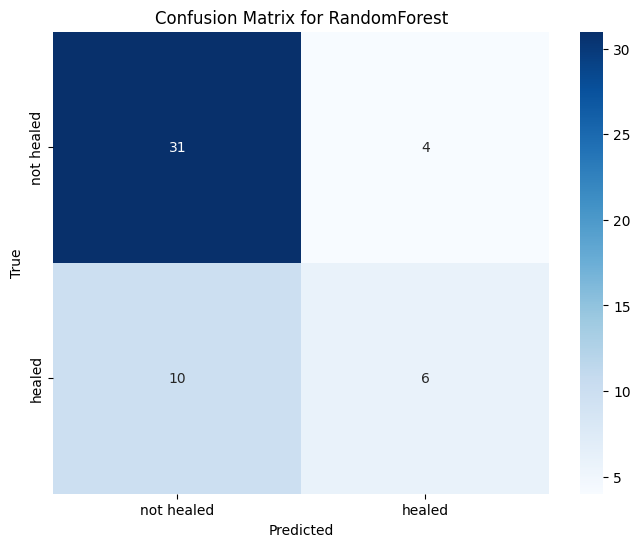

Classification report for SVM:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.62      0.31      0.42        16

    accuracy                           0.73        51
   macro avg       0.68      0.61      0.62        51
weighted avg       0.71      0.73      0.69        51




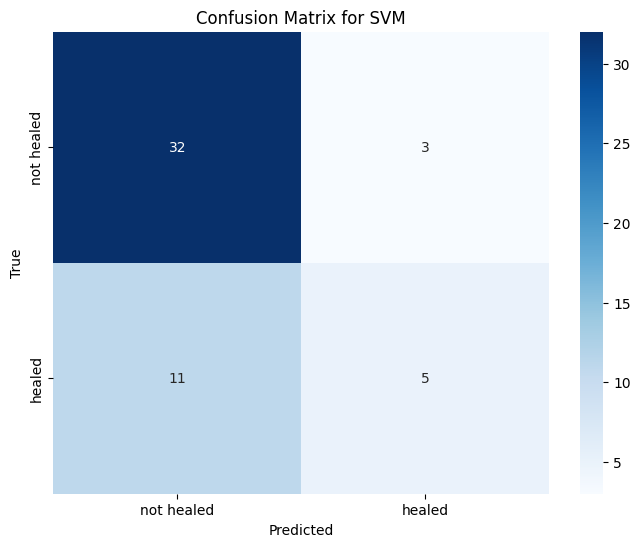

Classification report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.47      0.44      0.45        16

    accuracy                           0.67        51
   macro avg       0.61      0.60      0.61        51
weighted avg       0.66      0.67      0.66        51




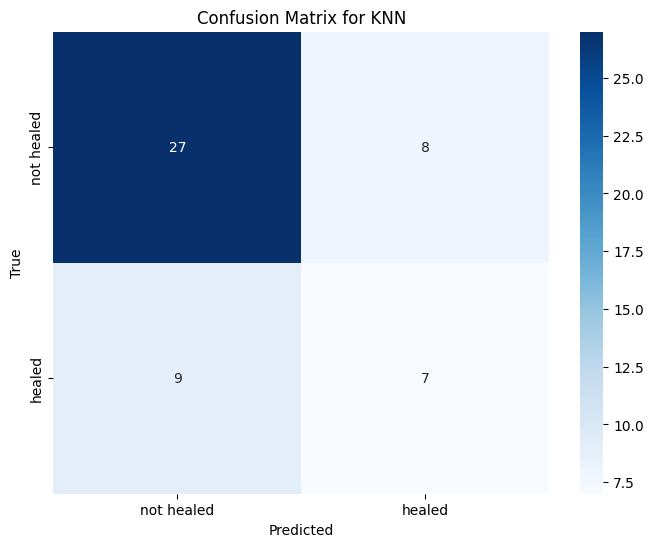

['scaler1.pkl']

In [13]:
# Class names
class_names = ['not healed', 'healed']

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, class_names, name)
    
    # Save the model
    joblib.dump(model, f'{name}_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler1.pkl')

In [15]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}\n")
    joblib.dump(model, f'{name}_model.pkl')

Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.58      0.44      0.50        16

    accuracy                           0.73        51
   macro avg       0.68      0.65      0.66        51
weighted avg       0.71      0.73      0.71        51


Classification report for SVM:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.62      0.31      0.42        16

    accuracy                           0.73        51
   macro avg       0.68      0.61      0.62        51
weighted avg       0.71      0.73      0.69        51


Classification report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.47      0.44      0.45        16

    accuracy                           0.67        51
   macro avg       0.61 

In [17]:
# Save the scaler
joblib.dump(scaler, 'scaler1.pkl')

['scaler1.pkl']